In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.metrics import confusion_matrix
import scipy.linalg as la
import sklearn.datasets as ds

# Regressão Linear

In [1]:
D=pickle.load(open('RegressData001.p', 'rb'))
(x,y)=(D['x'],D['y'])

plt.plot(x[0,:], y[0,:],'.')
plt.axis('scaled')
plt.grid(True)
plt.plot(np.array([-5,5]), np.array([-5, 5])-2, 'r')

NameError: name 'pickle' is not defined

In [3]:
# Construir X (2 × 500) - 2ª linha s ´o com “1s”
X=np.vstack((np.ones(500), x))
Rx=np.dot(X,X.T) # matrix 2 × 2
rxy=np.dot(X,y.T) # vector 2 × 1
# Estimar pesos
w=np.dot(la.pinv(Rx), rxy)
print(w)

[[-2.01391133]
 [ 0.99728753]]


## Erros

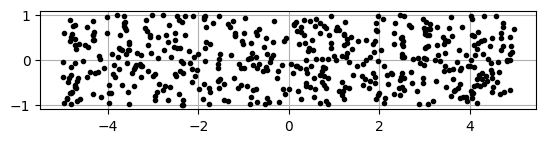

In [4]:
ye = np.dot(w.T, X)
e = y-ye

plt.plot(x[0,:], e[0,:], 'k.')
plt.axis('scaled')
plt.grid(True)

## coeficiente de r2

In [5]:
m = np.mean(y)
Vtot = np.mean((y-m)**2)
Pe = np.mean(e**2)
R2 = 1-Pe/Vtot
print(R2)

0.965452847371007


### polinomio segundo grau

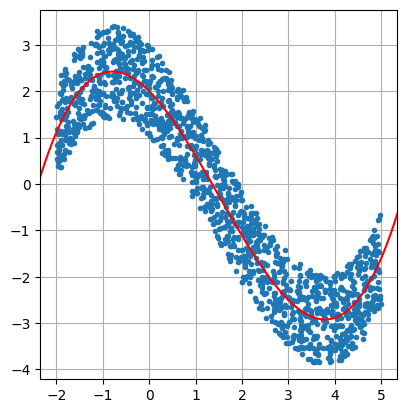

In [6]:
D=pickle.load(open('RegressData002.p', 'rb'))
(x,y)=(D['x'],D['y'])

plt.plot(x[0,:], y[0,:],'.')
plt.axis('scaled')
plt.grid(True)

t=np.linspace(-3, 6, 500)
plt.plot(t, 1/9*t**3-1/2*t**2-t+2, 'r')

[[ 1.11538364]
 [-0.91987301]]


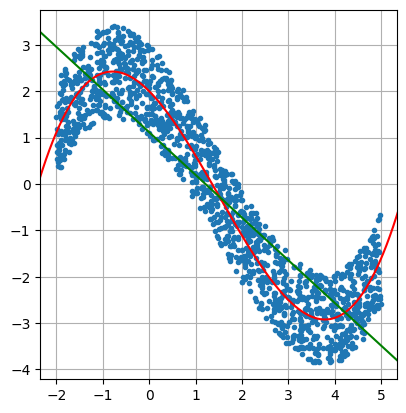

In [7]:
# Construir X (2 × 500) - 2ª linha s ´o com “1s”
X=np.vstack((np.ones(x.shape[1]), x))
Rx=np.dot(X,X.T) # matrix 2 × 2
rxy=np.dot(X,y.T) # vector 2 × 1
# Estimar pesos
w=np.dot(la.pinv(Rx), rxy)
print(w)

plt.plot(x[0,:], y[0,:],'.')
plt.axis('scaled')
plt.grid(True)

t=np.linspace(-3, 6, 500)
plt.plot(t, 1/9*t**3-1/2*t**2-t+2, 'r')
plt.plot(np.array([-3,6]), np.array([-3,6])*w[1]+w[0], 'g')

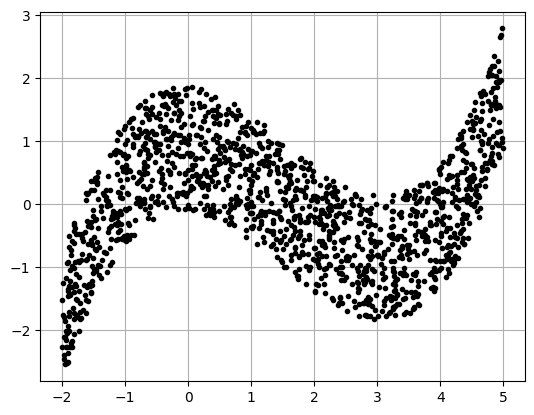

In [8]:
ye = np.dot(w.T, X)
e = y-ye

plt.plot(x[0,:], e[0,:], 'k.')
plt.axis('scaled')
plt.grid(True)

In [9]:
m = np.mean(y)
Vtot = np.mean((y-m)**2)
Pe = np.mean(e**2)
R2 = 1-Pe/Vtot
print(R2)

0.8001643397731499


[[ 2.01160905]
 [-0.98245165]
 [-0.51315283]
 [ 0.11294984]]


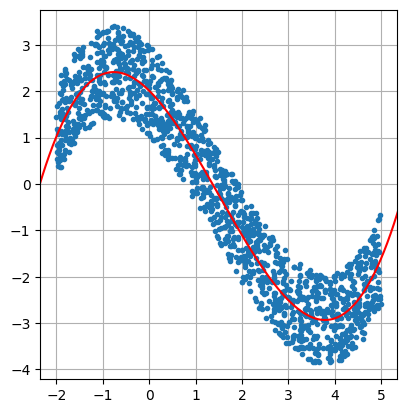

In [10]:
# Construir X (2 × 500) - 2ª linha s ´o com “1s”
X=np.vstack((np.ones(x.shape[1]), x, x**2, x**3))
Rx=np.dot(X,X.T) # matrix 2 × 2
rxy=np.dot(X,y.T) # vector 2 × 1
# Estimar pesos
w=np.dot(la.pinv(Rx), rxy)
print(w)

plt.plot(x[0,:], y[0,:],'.')
plt.axis('scaled')
plt.grid(True)

t=np.linspace(-3, 6, 500)
plt.plot(t, w[3]*t**3+w[2]*t**2+w[1]*t+w[0], 'r')

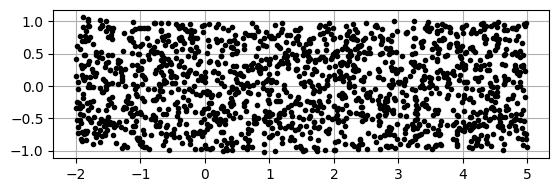

In [11]:
ye = np.dot(w.T, X)
e = y-ye

plt.plot(x[0,:], e[0,:], 'k.')
plt.axis('scaled')
plt.grid(True)

In [12]:
m = np.mean(y)
Vtot = np.mean((y-m)**2)
Pe = np.mean(e**2)
R2 = 1-Pe/Vtot
print(R2)

0.9255804391025634


# Boston

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

D = pickle.load(open('BostonDataset.p', 'rb'))
print(D.keys())
print(D.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX

In [14]:
X = D.data
y = D.target
X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3, shuffle=True, random_state=42)

rl = LinearRegression().fit(X1, y1)
print(rl.score(X1, y1))
print(rl.score(X2, y2))

0.7389831456966496
0.7262099239984441


In [15]:
print(rl.intercept_)
w = rl.coef_
print(w)

33.440834273883354
[-1.29469552e-01  3.79597901e-02  6.09783935e-02  3.21349778e+00
 -1.64996136e+01  3.91151860e+00 -1.26019052e-02 -1.42774164e+00
  2.39545629e-01 -8.17982439e-03 -9.35991036e-01  1.19478911e-02
 -5.46562433e-01]


In [16]:
Xa = np.vstack((np.ones(X1.shape[0]), X1.T))

Rx = np.dot(Xa, Xa.T)
rxy = np.dot(Xa, y1.T)
w2 = np.dot(la.pinv(Rx), rxy)
print(w2)

[ 3.34408343e+01 -1.29469552e-01  3.79597901e-02  6.09783935e-02
  3.21349778e+00 -1.64996136e+01  3.91151860e+00 -1.26019052e-02
 -1.42774164e+00  2.39545629e-01 -8.17982439e-03 -9.35991036e-01
  1.19478911e-02 -5.46562433e-01]


In [17]:
ya = np.dot(w2.T, Xa)
m = np.mean(y1)
V = np.mean((y1-m)**2)
P = np.mean((y1-ya)**2)
print(1-P/V)

0.7389831456966496


 # Regressão Polinomial

In [18]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3, include_bias=False).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)
print(X1a.shape)
rl = LinearRegression().fit(X1a, y1)
print(rl.score(X1a, y1))
print(rl.score(X2a, y2))

(337, 559)
1.0
-133.36697534902248


In [19]:
print(rl.coef_.max())

1.594262713937195


In [20]:
y1e = rl.predict(X1a)
print(y1e[:10])
print(y1[:10])

print()

y2e = rl.predict(X2a)
print(y2e[:10])
print(y2[:10])

[27.1 20.1 19.8 21.  41.3 23.2 20.4 18.5 29.4 36.4]
[27.1 20.1 19.8 21.  41.3 23.2 20.4 18.5 29.4 36.4]

[ 20.90823934  60.62796267  -9.2096118   32.46395529  20.8776215
 -26.36721915  17.19974485   8.30127615  -7.19474958  14.89407173]
[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8]


## Regularização

In [21]:
from sklearn.linear_model import Ridge, Lasso

D = pickle.load(open('BostonDataset.p', 'rb'))
X = D.data
y = D.target

X1, X2, y1, y2 = train_test_split(X, y, test_size=1/3, shuffle=True, random_state=42)

poly = PolynomialFeatures(degree=2, include_bias=False).fit(X1)
X1a = poly.transform(X1)
X2a = poly.transform(X2)

#rl = Ridge(alpha=1).fit(X1a, y1)
rl = Lasso(alpha=1).fit(X1a, y1)
print('R2 (treino):', rl.score(X1a, y1))
print('R2 (teste):', rl.score(X2a, y2))

R2 (treino): 0.8914413224692754
R2 (teste): 0.8329182239945707


/home/eduardo/Desktop/LEIM/GitHub/5s/ISEL_AA/venv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.935e+03, tolerance: 2.977e+00
  model = cd_fast.enet_coordinate_descent(


57


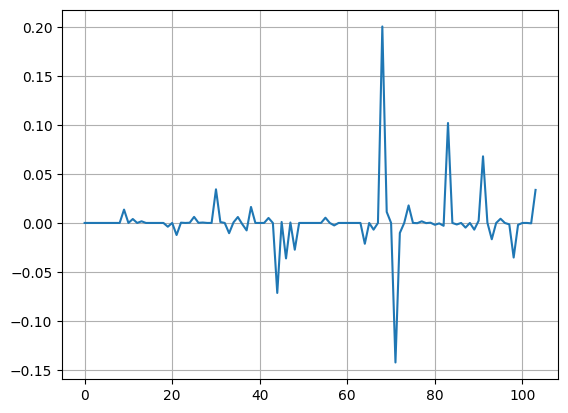

In [22]:
w = rl.coef_
plt.plot(w)
plt.grid(True)

print(np.sum(np.abs(w) > 1e-10))
#quanto mais perto do 0 melhor

# Regressão linear para sinais sonoros

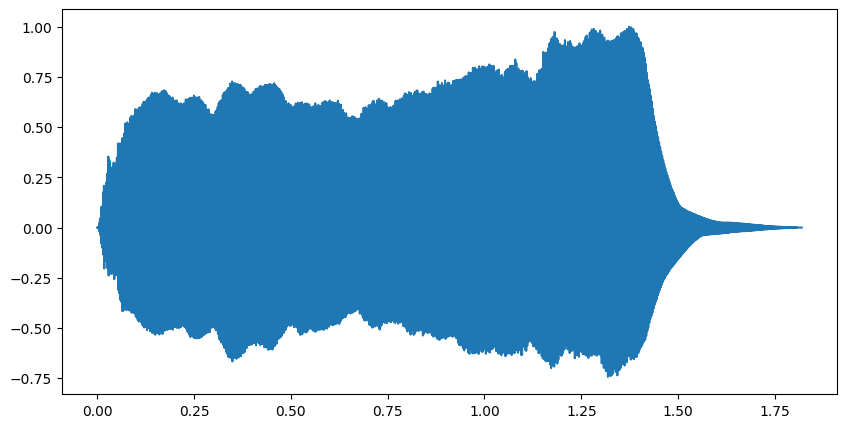

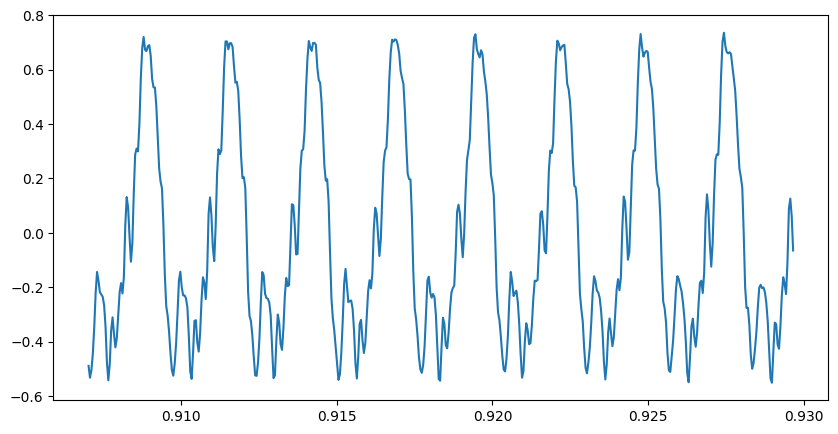

In [23]:
import scipy.signal as sg
import scipy.io.wavfile as wav
from soundPlay import soundPlay

wavFile = 'Violin.arco.ff.sulG.Gb4.mono.wav'
fs, x = wav.read(wavFile)
x = x*1./2**15

plt.figure(figsize=(10,5))
plt.plot(np.arange(x.shape[0])/fs, x)
plt.axis('tight')
plt.figure(figsize=(10,5))
plt.plot(np.arange(20000,20500)/fs, x[20000:20500])

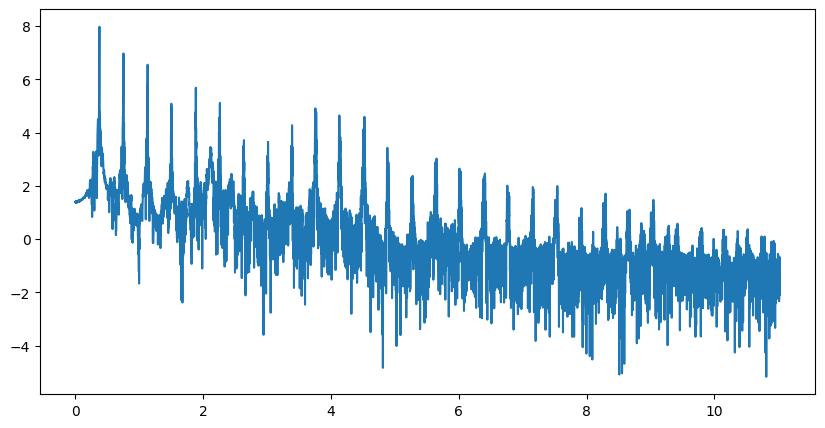

In [24]:
#soundPlay(x, fs)
xf = np.abs(np.fft.fft(x, 20000))
plt.figure(figsize=(10,5))
f = np.linspace(0, fs/2, 10000)/1000
plt.plot(f, np.log(xf[:10000]))

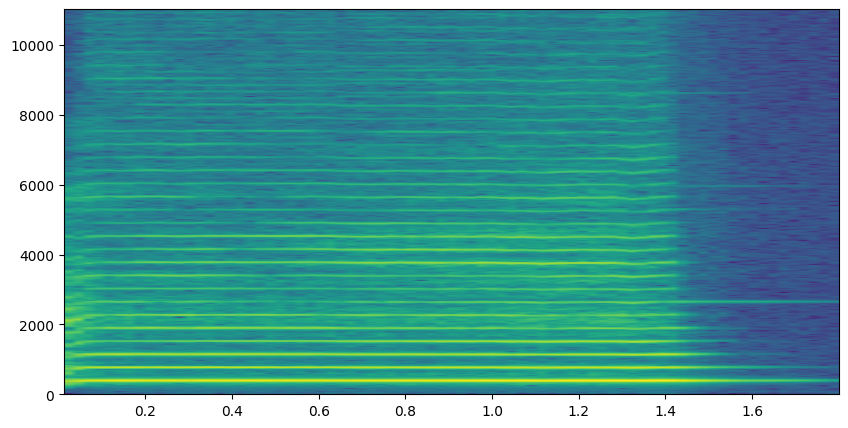

In [25]:
plt.figure(figsize=(10, 5))
tmp = plt.specgram(x, NFFT=1024, noverlap=512, Fs=fs)

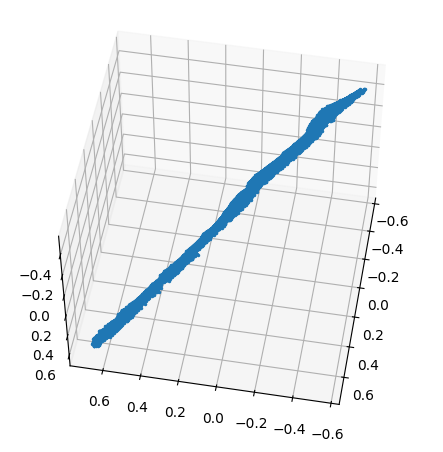

In [26]:
from mpl_toolkits.mplot3d import Axes3D

f1 = plt.figure(figsize=(6, 5.5))
ax = f1.add_subplot(111, projection = '3d')
xt = x[1000:6001]
ax.plot(xt[0:-2], xt[1:-1], xt[2:], '.-', ms = 3)
ax.elev = -130
ax.azim = 170

([<matplotlib.axis.YTick at 0x7f46f13c77d0>,
 [Text(0, -1.0, '−1.0'),
  Text(0, -0.5, '−0.5'),
  Text(0, 0.0, '0.0'),
  Text(0, 0.5, '0.5'),
  Text(0, 1.0, '1.0')])

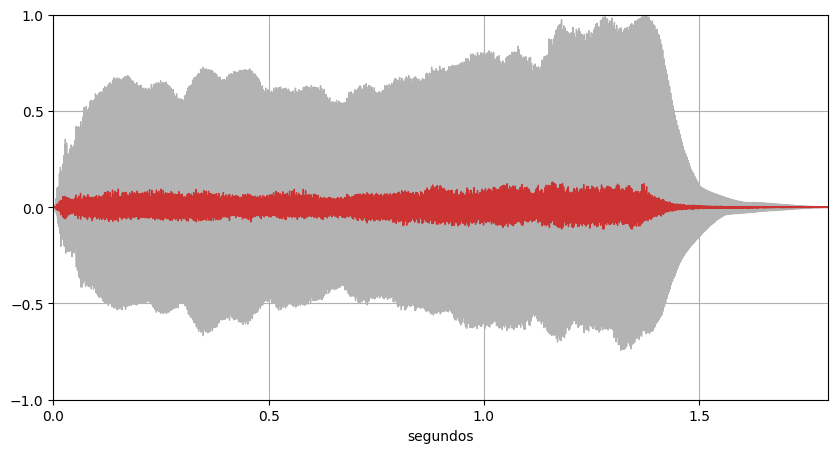

In [27]:
pF = 20
X = x[0:-pF]
for i in np.arange(pF-1, 0, -1):
    X = np.vstack((x[pF-i: -i], X))

#Matriz ixN dos ys
Y = x[pF:]
Y = Y[np.newaxis,:]

#estimar vetor dos w = [w1, w2, ..., w10].T
Rx = np.dot(X, X.T)
rxy = np.dot(X, Y.T)
w = np.dot(np.linalg.pinv(Rx), rxy)

#ver o erro de estimação
#calcular y^
Y2 = np.dot(w.T, X)
#erro instantanio
Er = Y-Y2
#erro total
ErTot = sum(Er**2)

plt.figure(figsize=(10, 5))
t = np.linspace(0, 1.0*Er.shape[1]/fs, Er.shape[1])
plt.plot(t, Y[0,:], '-', lw=1, color=[.7, .7, .7])
plt.plot(t, Er[0,:], '-', lw=1, color=[.8, .2, .2])
plt.axis([0, 1.8, -1, 1])
plt.grid(True)
plt.xlabel('segundos')
plt.xticks(np.arange(0, 1.8, .5))
plt.yticks(np.arange(-1, 1.1, .5))

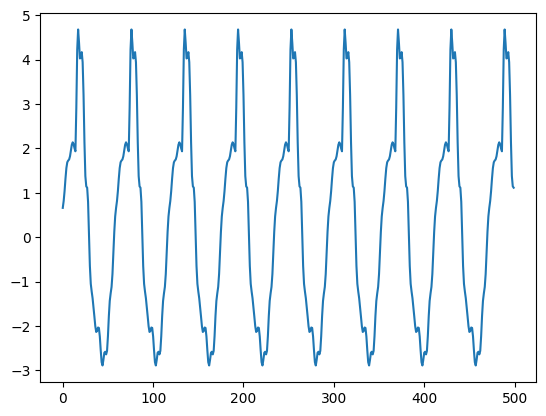

In [28]:
w2 = np.hstack((1, -w.squeeze()))
trDirac = np.zeros(x.shape[0])
trDirac[np.arange(0, x.shape[0], 59)] = 1.0
xSint = sg.lfilter(np.array([1.0]), w2, trDirac)

plt.plot(figsize=(10,5))
plt.plot(xSint[5000:5500])

# Classificação

In [29]:
fName = 'MNISTsmall.p'
D = pickle.load(open(fName, 'rb'))

X = D['X']*1.
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = X[:,f1]
y1 = y[f1]
X2 = X[:,f2]
y2 = y[f2]

Xa = X1[:,y1 == 0]
Xb = X1[:,y1 == 1]
X1 = np.vstack((np.ones(2000), np.hstack((Xa, Xb))))
y1 = np.hstack((-np.ones(1000), np.ones(1000)))

Xa = X2[:,y2 == 0]
Xb = X2[:,y2 == 1]
X2 = np.vstack((np.ones(1000), np.hstack((Xa, Xb))))
y2 = np.hstack((-np.ones(500), np.ones(500)))

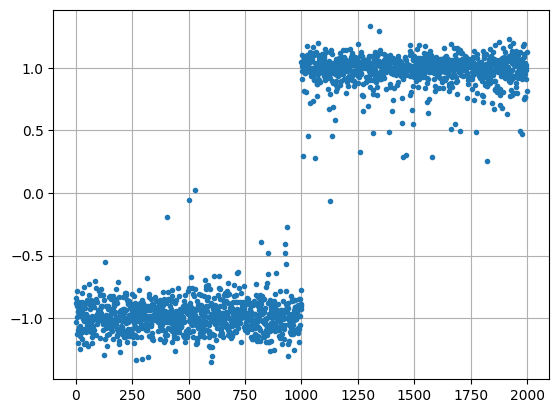

In [30]:
Rx = np.dot(X1, X1.T)
rxy = np.dot(X1, y1.T)
w = np.dot(la.pinv(Rx), rxy)

y1e = np.dot(w.T, X1)
y2e = np.dot(w.T, X2)

plt.plot(y1e, '.')
plt.grid(True)

In [31]:
y1eb = (y1e > 0)*2-1
np.argwhere(y1!=y1eb)

array([[ 527],
       [1127]])

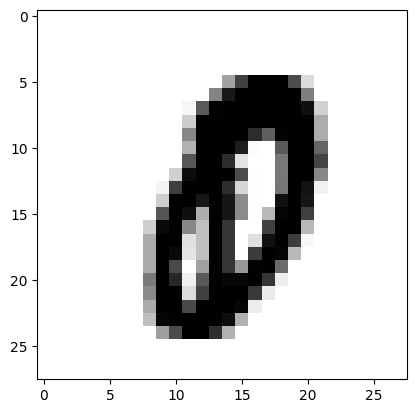

In [32]:
Z = X1[1:, 527].reshape((28,28))
plt.imshow(Z, cmap='binary')

(0.0, 1000.0, -2.0, 2.0)

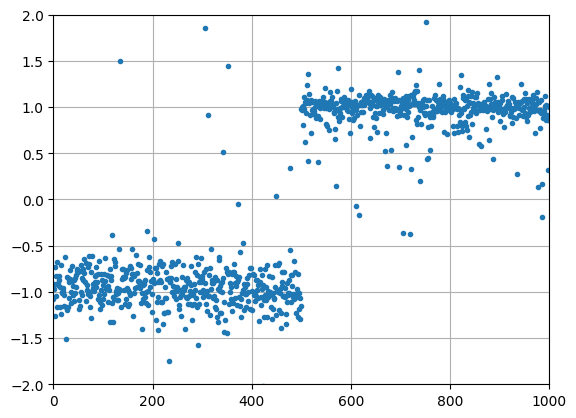

In [33]:
plt.plot(y2e, '.')
plt.grid(True)
plt.axis([0,1000,-2,2])

In [34]:
y2eb = (y2e > 0)*2-1
np.argwhere(y2!=y2eb).squeeze()

array([ 24,  63,  89, 134, 196, 205, 232, 306, 312, 343, 346, 348, 353,
       402, 449, 478, 610, 617, 705, 719, 848, 941, 985])

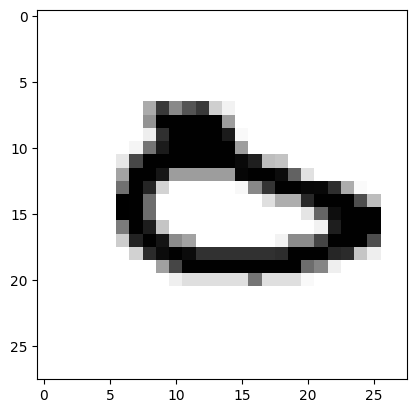

In [35]:
Z = X2[1:, 63].reshape((28,28))
plt.imshow(Z, cmap='binary')

In [36]:
from plot_confusion_matrix import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
import sklearn.preprocessing as pp

fName = 'MNISTsmall.p'
D = pickle.load(open(fName, 'rb'))

X = D['X']*1.
y = D['trueClass']
f1 = D['foldTrain']
f2 = D['foldTest']

X1 = np.vstack((np.ones(10000), X[:,f1]))
X2 = np.vstack((np.ones(5000), X[:,f2]))

y1 = y[f1]
y2 = y[f2]

In [37]:
Y1=-np.ones((10,10000))
for i in range(10):
    Y1[i,y1==i]=1

Rx=np.dot(X1, X1.T)
rxy=np.dot(X1, Y1.T)
W=np.dot(la.pinv(Rx),rxy)

1173 0.1173


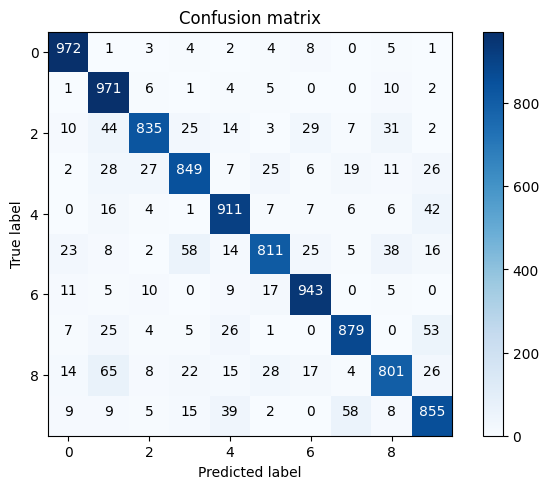

In [38]:
Y1e =  np.dot(W.T, X1)
y1e = np.argmax(Y1e, axis=0)
MC = confusion_matrix(y1, y1e)
print(np.sum(y1 != y1e), np.sum(y1 != y1e)/y1.shape[0])
plot_confusion_matrix(MC)

999 0.1998


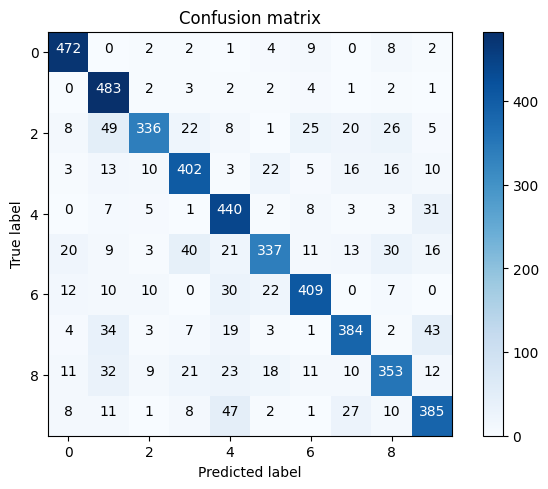

In [39]:
Y2e =  np.dot(W.T, X2)
y2e = np.argmax(Y2e, axis=0)
MC = confusion_matrix(y2, y2e)
#print(MC)
print(np.sum(y2 != y2e), np.sum(y2 != y2e)/y2.shape[0])
plot_confusion_matrix(MC)

# Discriminantes quadráticos

dict_keys(['data', 'target'])


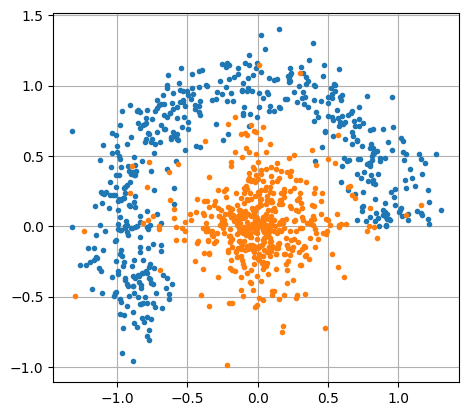

In [40]:
fName = 'QuadDiscData.p'
D = pickle.load(open(fName, 'rb'))
print(D.keys())

x = D['data']
y = D['target']

plt.plot(x[0, y==0], x[1, y==0], '.')
plt.plot(x[0, y==1], x[1, y==1], '.')
plt.axis('scaled')
plt.grid(True)

266


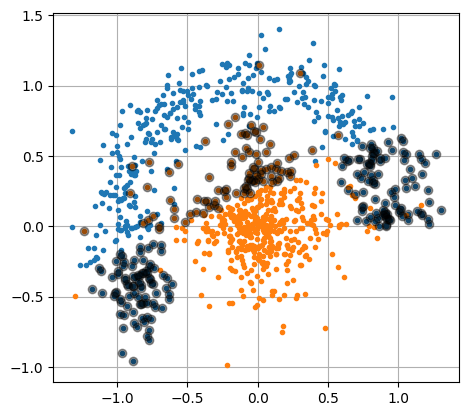

In [41]:
X = np.vstack((np.ones(1000), x))
Y = y*2-1

Rx=np.dot(X, X.T)
rxy=np.dot(X, Y.T)
w=np.dot(la.pinv(Rx),rxy)
yb = np.dot(w.T, X)
ye = (yb >= 0)*1
print(np.sum(y != ye))

plt.plot(x[0, y==0], x[1, y==0], '.')
plt.plot(x[0, y==1], x[1, y==1], '.')
plt.plot(x[0, y!=ye], x[1, y!=ye], 'ok', alpha=.4)
plt.axis('scaled')
plt.grid(True)

45


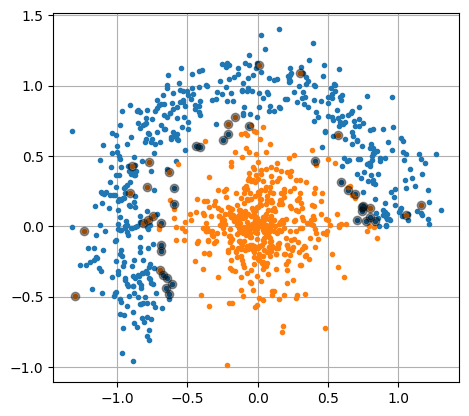

In [42]:
poly = pp.PolynomialFeatures(2).fit(x.T)
X = poly.transform(x.T).T
Y = y*2-1

Rx=np.dot(X, X.T)
rxy=np.dot(X, Y.T)
w=np.dot(la.pinv(Rx),rxy)
yb = np.dot(w.T, X)
ye = (yb >= 0)*1
print(np.sum(y != ye))

plt.plot(x[0, y==0], x[1, y==0], '.')
plt.plot(x[0, y==1], x[1, y==1], '.')
plt.plot(x[0, y!=ye], x[1, y!=ye], 'ok', alpha=.4)
plt.axis('scaled')
plt.grid(True)

In [43]:
import sklearn.datasets as DT
D = DT.load_iris()
x = D.data
y = D.target

In [44]:
X = np.vstack((np.ones(150), x.T))
Y = -np.ones((3,150))
for i in range(3):
    Y[i,y==i]=1

Rx=np.dot(X, X.T)
rxy=np.dot(X, Y.T)
w=np.dot(la.pinv(Rx),rxy)
yb = np.dot(w.T, X)
ye = np.argmax(yb, axis=0)
print(np.sum(y != ye))

23


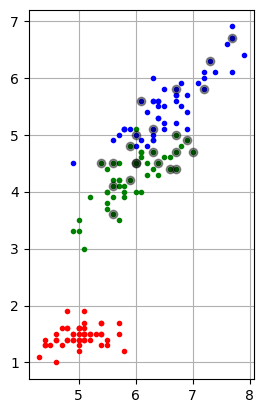

In [45]:
plt.plot(x[y==0, 0], x[y==0, 2], '.r')
plt.plot(x[y==1, 0], x[y==1, 2], '.g')
plt.plot(x[y==2, 0], x[y==2, 2], '.b')
plt.plot(x[y!=ye, 0], x[y!=ye, 2], 'ok', alpha=.4)
plt.axis('scaled')
plt.grid(True)

In [46]:
x = D.data
y = D.target

poly = pp.PolynomialFeatures(2).fit(x)
X = poly.transform(x).T
Y = -np.ones((3,150))
for i in range(3):
    Y[i,y==i]=1

Rx=np.dot(X, X.T)
rxy=np.dot(X, Y.T)
w=np.dot(la.pinv(Rx),rxy)
yb = np.dot(w.T, X)
ye = np.argmax(yb, axis=0)
print(np.sum(y != ye))

3


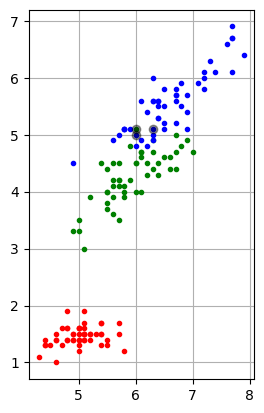

In [47]:
plt.plot(x[y==0, 0], x[y==0, 2], '.r')
plt.plot(x[y==1, 0], x[y==1, 2], '.g')
plt.plot(x[y==2, 0], x[y==2, 2], '.b')
plt.plot(x[y!=ye, 0], x[y!=ye, 2], 'ok', alpha=.4)
plt.axis('scaled')
plt.grid(True)